# Model Assessment and Selection

The generalization performance of a learning method relates to its prediction capability on independent test data

### Measuring the Quality of Fit

The case of a quantitative response
* target variable $Y$ ,
* a vector of inputs $X$, and a
* prediction model $\hat{f}(X)$ that has been estimated from a training set $T$

The loss function for measuring errors between $Y$ and $\hat{f}(X)$ is denoted by $L(Y, \hat{f}(X))$

A typical choice is squared error.

$$L(Y, \hat{f}(X))=(Y - \hat{f}(X))^2$$

**Test error** (generalization error) is the prediction error over an independent test sample. Sample out of $T$.

It is read: The expected error of the trained model on sample $\text{T}$ evaluate on data out of $T$

$$\text{Err}_\text{T} = E[L(Y, \hat{f}(X))|T]$$

* Where $(X, Y)$ are drawn randomly from their joint distribution. 
* The training set $T$ is fixed, and test error refers to the error for this specific training set, but recall, it is evalued for sample out of $T$.

* A related quantity is the expected prediction error (or expected test error).

$$\text{Err} = \text{E}[\text{Err}_\text{T}]$$


**Training error** is the average loss over the training sample

$$\bar{\text{err}} = \frac{1}{N} \sum_{i=1}^{N} L(y_i, \hat{f}(x_i))$$

*We are interested in the accuracy of the predictions that we obtain when we apply our method to previously unseen
test data*.

We need to fit a method that predict well for the *future* 

How can we go about trying to select a method that minimizes the $\text{Err}_\text{T}$? 

- In some settings, we may have a test data set available—that is,
- we may have access to a set of observations that were not used to train
the statistical learning method. 
- We can then simply evaluate on the
test observations, and select the learning method for which the test $\text{Err}_\text{T}$ is
smallest.

If didn't have test data in order to evaluate the learning method, we only would confidence in $\bar{\text{err}}$ (training error). But this would not a good idea since reduce training error don't guarantee accuracy predictions in the *future*.

Hence, we can reduce the training error to zero (doing a model very, complex), but this won't guarantee accuracy predictions in the *future*.

> Fundamental property of statistical learning:
>
> Regardless of the particular data set at hand
and regardless of the statistical method being used. As model fexibility
increases, the $\bar{\text{err}}$  will decrease, but the $\text{Err}_\text{T}$ may not. 

When
a given method yields a small  $\bar{\text{err}}$  but a large $\text{Err}_\text{T}$, we are
said to be overftting the data.

This happens because our statistical learning
procedure is working too hard to find patterns in the training data, and
may be picking up some patterns that are just caused by random chance
rather than by true properties of the unknown.


Note that regardless of whether or not overftting has
occurred, we almost always expect the $\bar{\text{err}}$ to be smaller than
the $\text{Err}_\text{T}$ because most statistical learning methods either directly or
indirectly seek to minimize the  $\bar{\text{err}}$. *Overftting refers specifically
to the case in which a less fexible model would have yielded a smaller* $\text{Err}_\text{T}$.

In [272]:
from scipy.stats import uniform, norm
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns

In [ ]:
size = 300
x = np.linspace(0,5, size)
f = np.sin(x)
e = 0.2*norm.rvs(size = size, random_state = 123)
y = f + e

In [222]:
class Evaluation:
    def __init__(self, x:np.array, y:np.array ):

        self.x = np.reshape(x,(-1, 1))
        self.y = np.reshape(y,(-1, 1))
        self.random_state =  12
        self.x_train, self.x_test, self.y_train, self.y_test = (
                train_test_split(self.x, self.y, 
                random_state = self.random_state))
        self.flexibility = [1, 2, 5, 10]
        self.const = 30
        self.array_mse_train = []
        self.array_mse_test = []

    def model(self, min_samples_split:int):
        tree = DecisionTreeRegressor(
            min_samples_split = min_samples_split,
            random_state = self.random_state
            )
        return tree

    def evaluate(self):
        for flex in self.flexibility:
            model = self.model(int(round(self.const/flex)))
            model.fit(self.x_train, self.y_train)
            mse_train = mean_squared_error(self.y_train, model.predict(self.x_train))
            mse_test = mean_squared_error(self.y_test, model.predict(self.x_test))
            self.array_mse_train.append(mse_train)
            self.array_mse_test.append(mse_test)

In [237]:
evaluation = Evaluation(x, y)

evaluation.evaluate()

flexibility = evaluation.flexibility.copy()
data_mse_test = evaluation.array_mse_test.copy()
data_mse_train = evaluation.array_mse_train.copy()

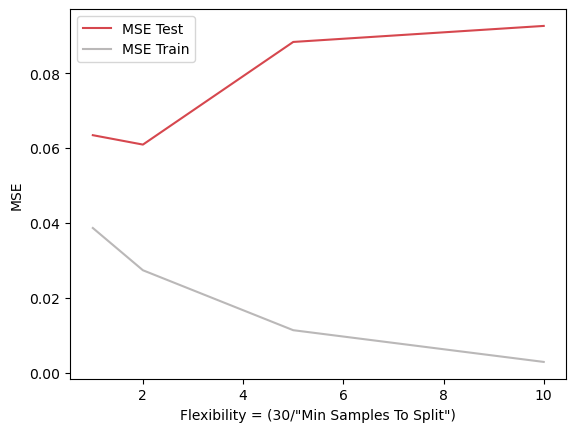

In [241]:
fig, ax = plt.subplots()

ax.plot(flexibility, data_mse_test,c = '#d6474e', label = 'MSE Test')
ax.plot(flexibility, data_mse_train, c = '#bab8b8', label = 'MSE Train')
ax.set_xlabel('Flexibility = (30/"Min Samples To Split")')
ax.set_ylabel('MSE')
ax.legend();

### The Bias-Variance Trade-Off

The expected test MSE, for a given value x can always be decomposed into the sum of three fundamental quantities: the
variance of fˆ(x0), the squared bias of f ˆ(x0) and the variance of the error variance bias terms " .

$$E[(y − \hat{f}(\text{x}))^2] = \text{Var}(\hat{f}(\text{x})) + [\text{Bias}(\hat{{f}}(\text{x}))]^2 + \text{Var}(\epsilon)$$

What do we mean by the variance and bias of a statistical learning
method? `Variance` refers to the amount by which $\hat{f}$ would change 
if we estimated it using a diferent training data set and predict on unseen data. That is 
this change is evaluate on unseen data.

 ideally the estimate for f should not vary
too much between training sets. However, if a method has high variance
then small changes in the training data can result in large changes in f

This means this method only is specialized on training data and it can not generalize.



On the other hand, `bias` refers to the error that is introduced by approximating a real-life problem, which may be extremely complicated, by a much
simpler model.

* As the model becomes more and more complex, it uses the training data more and is able to adapt to more complicated underlying structures. 

* Hence there is a decrease in bias but an increase in variance. 

* Training error consistently decreases with model complexity, typically dropping to zero if we increase the model complexity enough. 

* However, a model with zero training error is overfit to the training data and will typically generalize poorly

* If the data is linearly with a linear model is enought to predict with low error.

<!-- <div align = "center">
  <img src = "assets/assessment/Captura_mcomplex.PNG" />  
</div> -->

Behavior of test sample and training sample error as the model complexity is varied

* Light blue curves show the *training error*
    * Solid blue curve is the average.
* Light red curves show the *test error* condicionated (previosly trained) on $T$, so this is $\text{Err}_T$
    * Solid red curve is the average. This is $E[\text{Err}_T]$

In [401]:
-0.80*np.log2(0.80) - 0.20*np.log2(0.20) 

0.7219280948873623

In [349]:
mse_model = namedtuple('mse_model', ['mse_train', 'mse_test', 'flex', 'random_state'])

u = uniform.rvs(size = 10, random_state=10)
random_states = np.round(u*100).astype(int)

In [362]:
size = 300
x = np.linspace(0,5, size)
f = np.sin(x)

flexibility = [1, 2, 5, 10]
const = 30
array_mse = []

for random_state in random_states:
    for flex in flexibility:
        e = 0.2*norm.rvs(size = size, random_state = random_state)
        y = f + e
        X = x.reshape(-1, 1).copy()
        X_train, X_test, y_train, y_test = (
            train_test_split(X, y, 
            random_state=random_state))
        tree = DecisionTreeRegressor(min_samples_split=int(round(const/flex)), 
        random_state=random_state)
        tree.fit(X_train, y_train)
        mse_train = mean_squared_error(y_train, tree.predict(X_train))
        mse_test = mean_squared_error(y_test, tree.predict(X_test))
         
        array_mse.append(
            mse_model(
                mse_train, 
                mse_test,
                flex,
                random_state))

In [360]:
data_frame = pd.DataFrame(array_mse)

dataset = data_frame.melt(
    id_vars = ['flex', 'random_state'],
    var_name = 'Tipo',
    value_name = 'MSE'
)

In [385]:
dataset.loc[(dataset.flex == 1) &(dataset.Tipo == 'mse_test'), 'MSE'].std()

0.007329127015503287

In [386]:
dataset.loc[(dataset.flex == 10) &(dataset.Tipo == 'mse_test'), 'MSE'].std()

0.01651598316801966

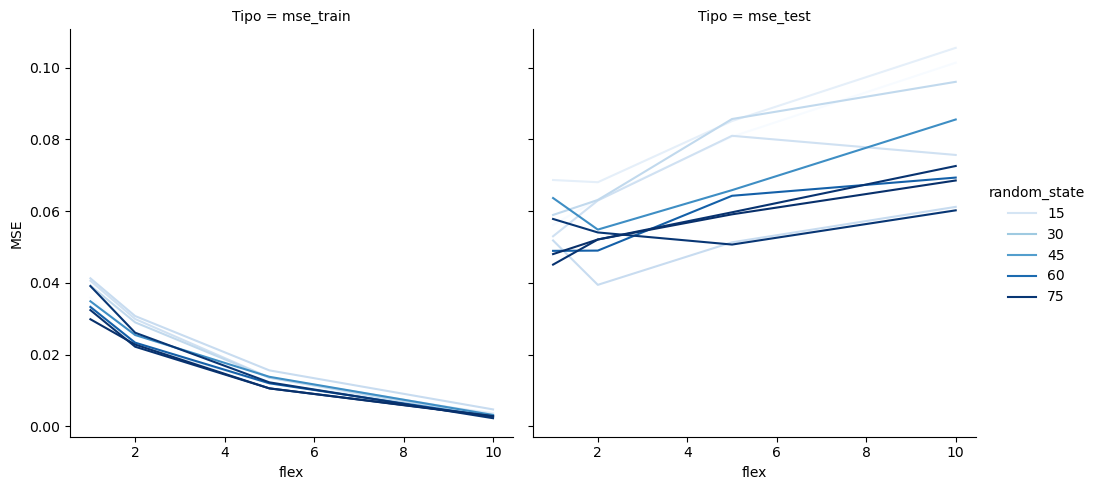

In [379]:
sns.relplot(
    data = dataset, kind = 'line', 
    x = 'flex', y = 'MSE', 
    hue='random_state', 
    col="Tipo", palette = 'Blues');

The similar results can be found in categorical models. 

* The response $G$ taking one of $K$ values in a set $g$, labeled for convenience as $1, 2, . . . , K$. 

* Typically we model the probabilities $p_{k(X)} = Pr(G = k|X)$, and then $\hat{G}(X) = \argmax_{k} \hat{p}_{k(X)}$.

* Typical loss functions are

  * $L(G, \hat{G}(X)) = I(G \neq \hat{G}(X)) - (0–1 \;\text{loss})$
  
  * $L(G, \hat{p}(X)) = -2 log \; \hat{p}_G (X) - (−2 × log-likelihood)$

* Test error here is $\text{Err}_\text{T} = E[L(G, \hat{G}(X))|T ]$ the population misclassification error of the classifier trained on $T$.

* Trainning error using −2 × log-likelihood is $\bar{\text{err}} = -\frac{2}{N}\sum_{1}^{N} log \hat{p}_{g_i}(x_i)$


We describe a number of methods for estimating the **expected test error** for a model.

Typically our model will have a tuning parameter or parameters $α$ and so we can write our predictions as $\hat{f}_{\alpha}(x)$. 

The tuning parameter varies the complexity of our model, and we wish to find the value of α that minimizes error.

* We have two goals:

  * *Model selection*: estimating the performance of different models in order to choose the best one

  * *Model assessment*: having chosen a final model, estimating its prediction error (generalization error) on new data.


* The best approach is randomly divide the dataset into three parts:
  * Training set (It's used for *model selection*) $50\%$
  * Validation set (It's used for *model selection*) $25\%$
  * Test set (It's used for *model assessment*) $25\%$. The test set should be kept in a “vault,” and be brought out only
at the end of the data analysis
   






## The Bias–Variance Decomposition

* Given $Y = f(X) + \epsilon$, where $E[\epsilon] = 0$ and $V[\epsilon] = \sigma_{\epsilon}^2$

* The expected prediction error of a regression fit $\hat{f}(X)$ at an input point $X = x_0$ is 

$$E[(Y - \hat{f}(x))^2 |X = x]$$

$$E[(f(X) + \epsilon - \hat{f}(x))^2 |X = x]= E[(f(x) + \epsilon - \hat{f}(x))^2]$$

$$=E[f(x)^2 + \epsilon^2 + 2\epsilon f(x) +  \hat{f}(x)^2 - 2 (f(x) + \epsilon)\hat{f}(x)]$$

$$=\sigma_{\epsilon}^2 + E[f(x)^2 + \hat{f}(x)^2 - 2 f(x)\hat{f}(x) ]$$

<!-- \sigma_{\epsilon}^2 + E[f(x)^2 + \hat{f}(x)^2 - 2 f(x)\hat{f}(x) ] -->
<!-- \sigma_{\epsilon}^2 + E[(f(x) - \hat{f}(x))^2] -->

<!-- $$  = \sigma_{\epsilon}^2 +  E[f(x)^2] + E[\hat{f}(x)]^2 - E[\hat{f}(x)]^2+ E[\hat{f}(x)]^2 - 2 E[ f(x)\hat{f}(x)]  $$ -->

$$= \sigma_{\epsilon}^2+  E[f(x)^2 + \hat{f}(x)^2 - E[\hat{f}(x)]^2+ E[\hat{f}(x)]^2 - 2 f(x)\hat{f}(x) - 2 \hat{f}(x)E[\hat{f}(x)]+2 \hat{f}(x)E[\hat{f}(x)] ] $$

<!-- $$= \sigma_{\epsilon}^2 + (E[\hat{f}(x)^2] - E[\hat{f}(x)]^2) +  (f(x)^2 + E[\hat{f}(x)]^2  - 2 f(x) E[\hat{f}(x) ] ) $$ -->
<!--  -->
$$ = \sigma_{\epsilon}^2 + E[(\hat{f}(x) -  E[\hat{f}(x)])^2] + [E[\hat{f}(x)] - f(x)]^2$$

$$ = \text{irreductible error} + \text{Var}(\hat{f}(x)) + \text{bias}^2$$



* The first term is the variance of the target around its true mean $f(x_0)$, and cannot be avoided no matter how well we estimate $f(x_0)$

* The second term is variance, the expected squared deviation of $\hat{f}(x_0)$ around its mean.

* The third term is bias, the amount by which the average of our estimate differs from the true mean.
* Typically the more complex we make the model $\hat{f}$, the lower the (squared) bias but the higher the variance.

* For the $k$-nearest-neighbor regression fit

$$E[(Y - \hat{f}(x_0))^2 |X = x_0]$$

$$ = \sigma_{\epsilon}^2  +  [ f(x_0)  - \frac{1}{k} \sum_{l=1}^{k} f(x_l)] + \frac{\sigma_{\epsilon}^2}{k}$$

* Here we assume for simplicity that training inputs $x_i$

* The number of neighbors $k$ is inversely related to the model complexity. For small $k$, the estimate $\hat{f}_k(x)$ can potentially adapt itself better to the underlying $f(x)$. 

* As we increase $k$, the bias—the squared difference between $f(x_0)$ and the average of $\hat{f}(x_0)$ at the $k$-nearest neighbors—will typically increase, while the variance decreases.

### Bias–Variance Tradeoff - Example

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

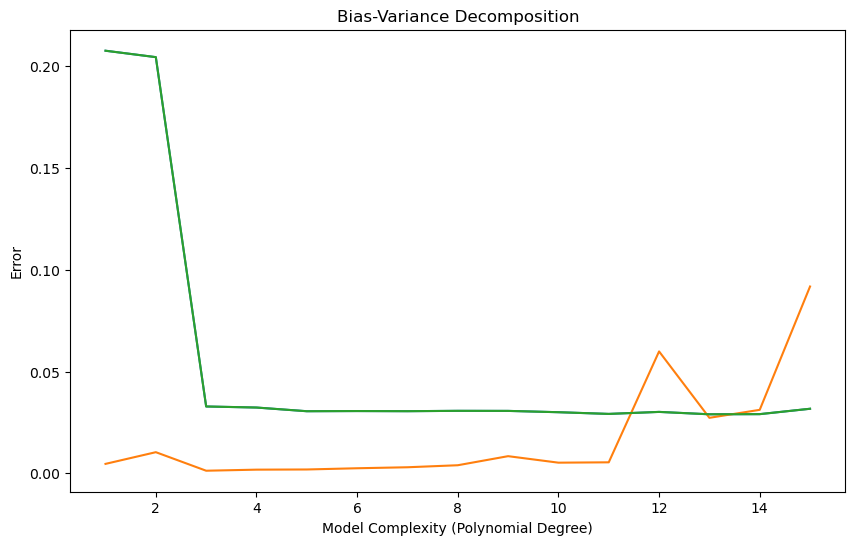

In [406]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Generate synthetic data
np.random.seed(42)
n_samples = 100
X = np.random.uniform(-3, 3, size=n_samples)
y_true = np.sin(X) + np.random.normal(0, 0.2, size=n_samples)  # True relationship

X = X[:, np.newaxis]

# Step 2: Define a function to calculate bias and variance
def bias_variance_decomposition(X, y_true, degrees, n_bootstrap_samples=50):
    bias_squared = []
    variance = []
    mse = []

    for degree in degrees:
        y_preds = []
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X)

        for _ in range(n_bootstrap_samples):
            sample_indices = np.random.choice(np.arange(n_samples), size=n_samples, replace=True)
            X_sample = X_poly[sample_indices]
            y_sample = y_true[sample_indices]
            
            model = LinearRegression().fit(X_sample, y_sample)
            y_pred = model.predict(X_poly)
            y_preds.append(y_pred)

        y_preds = np.array(y_preds)
        y_pred_mean = np.mean(y_preds, axis=0)
        
        bias_squared.append(np.mean((y_true - y_pred_mean) ** 2))
        variance.append(np.mean(np.var(y_preds, axis=0)))
        mse.append(mean_squared_error(y_true, y_pred_mean))

    return bias_squared, variance, mse

# Step 3: Calculate bias, variance, and MSE for different model complexities
degrees = np.arange(1, 16)
bias_squared, variance, mse = bias_variance_decomposition(X, y_true, degrees)

# Step 4: Plot the bias-variance decomposition
plt.figure(figsize=(10, 6))
plt.plot(degrees, bias_squared, label='Bias^2')
plt.plot(degrees, variance, label='Variance')
plt.plot(degrees, mse, label='MSE')
plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylabel('Error')
plt.title('Bias-Variance Decomposition')
plt.legend

In [407]:
x = [np.array([1, 20]), np.array([17, 2])]

In [409]:
np.array(x)

array([[ 1, 20],
       [17,  2]])

In [255]:
from collections import namedtuple

mse_model = namedtuple('mse_model', ['mse_test','Var', 'bias' ,'n_neighbors'])

In [259]:
model_eval_to_frame = []

for random_state in random_states:

    for n_neighbors in range(1, 20):
        
        sample = data_population.sample(50, random_state=random_state, replace=False)
        X, y = sample[['X']].values, sample.y.values
        X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=random_state)
    
        # Model
        kneigbors = KNeighborsRegressor(n_neighbors=n_neighbors)
        kneigbors.fit(X_train, y_train)

        mse_test = metrics.mean_squared_error(y_true=y_test, y_pred=kneigbors.predict(X_test))
        
        mse_model_realized = mse_model(
            mse_test=mse_test, 
            n_neighbors=n_neighbors, 
            Var=np.var(kneigbors.predict(X_test)), 
            bias=mse_test - np.var(kneigbors.predict(X_test)) )
        
        model_eval_to_frame.append(mse_model_realized)

In [289]:
model_eval = pd.DataFrame(model_eval_to_frame)
model_eval['idx'] = model_eval.groupby('n_neighbors').cumcount()
model_eval_pivot = model_eval.pivot(index = 'idx', columns= 'n_neighbors')
model_eval_pivot_tab = model_eval_pivot.stack(1).unstack(0)

model_eval_pivot_tab = model_eval_pivot_tab.sort_index(axis=0, ascending=False).copy()
model_eval_pivot_tab.index = model_eval_pivot_tab.index.astype(str)

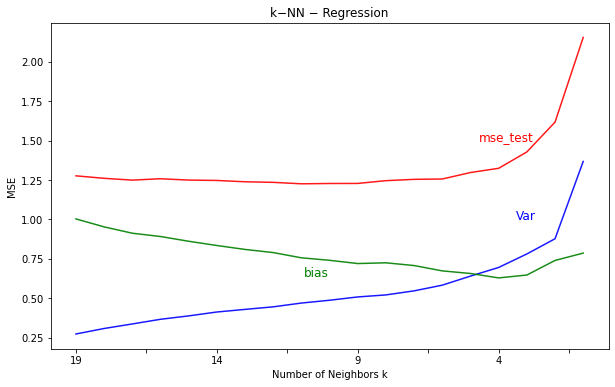

In [327]:
fig, ax = plt.subplots(figsize = (10, 6) )

colors = ['r', 'b', 'g']
var_bias =['mse_test', 'Var', 'bias']

for color, mse_name in zip(colors, var_bias):
    to_plot = model_eval_pivot_tab[mse_name].mean(axis=1)
    to_plot.name = mse_name
    to_plot.plot(ax =ax, color = color, alpha = 0.9, legend = False)

ax.set(xlabel = 'Number of Neighbors k', ylabel = 'MSE', title = 'k−NN − Regression')

ubis = [(14.3, 1.5), (15.6, 1), (8.1, 0.64)]

for color, mse_name, ubi in zip(colors, var_bias, ubis):
    ax.text(*ubi, mse_name, fontsize = 12, color = color)


## The Bayesian Approach and BIC

## Cross-Validation

* This method directly estimates the expected extra-sample error $Err = E[L(Y, \hat{f}(X))]$
* The average generalization error when the method $\hat{f}(X)$ is applied to an independent test sample from the joint distribution of $X$ and $Y$.

#### K-Fold Cross-Validation

* $K$-fold crossvalidation uses part of the available data to fit the model, and a different part to test it.
* We split the data into $K$ roughly equal-sized parts, for example, when $K = 5$, the scenario looks like this

<center>

|1|2|3|4|5|
|-|-|-|-|-|
|train|train|validation|train|train|

</center>

* For the $k_{th}$ part (third above), we fit the model to the other $K − 1$ parts of the data, and calculate the prediction error of the fitted model when predicting the kth part of the data. 

The cross-validation estimate of prediction error is:

$$CV(\hat{f}) = \frac{1}{N} \sum_{i=1}^{N} L(y_i, \hat{f}^{−κ(i)}(x_i))$$

* For $K = 5$, the $5^{th}$ part of the training data is of size N, where the points is randomly localized.
* The 4 parts remaining is used to fit.
* Denote by $\hat{f}^{−k(x)}$ the fitted function

Given a set of models $f(x, α)$ indexed by a tuning parameter $α$, denote by $\hat{f}^{−k(i)}{(x_i, α)}$ the $α$ th model fit with the $k$ th part of the data removed. Then for this set of models we define.

$$CV(\hat{f}, \alpha) = \frac{1}{N} \sum_{i=1}^{N} L(y_i, \hat{f}^{−κ(i)}(x_i, \alpha_i))$$

The function $CV(\hat{f}, α)$ provides an estimate of the test error curve, and we find the tuning parameter $\hat{α}$ that minimizes it

* $K=5$ is chosen if the size of data training is enought big.  
* Overall, five- or tenfold cross-validation are recommended as a good compromise: see Breiman and Spector (1992) and Kohavi (1995).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
from sklearn import model_selection, metrics
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Load the data
data_drime = pd.read_stata(r'data_dta/CRIME1.dta')

# Generate the variable arr86, where a person is labeled equal to 0, if he has not committed a crime in 1986
# otherwise 1.
data_drime['arr86'] = data_drime.narr86.where(data_drime.narr86==0, 1)

# Selecting the features and target
features= ['pcnv', 'avgsen', 'tottime', 'ptime86', 'qemp86']
target = 'arr86'

X = np.array(data_drime[features])
y = np.array(data_drime[target])

# Split the data to train and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=123, test_size=0.25)

The simplest way to use cross-validation is to call the `cross_val_score` 

In [80]:
fit_to_grid_cv = model_selection.GridSearchCV(
    
    estimator=RandomForestClassifier(
        n_estimators=200),
    scoring= 'roc_auc',
    cv=5,
    param_grid={
        'ccp_alpha': np.exp(np.linspace(-10,10, 10)), \
        'min_samples_split':range(2, 10)},
    verbose=False,
    return_train_score=True
)

In [81]:
fit_to_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'ccp_alpha': array([4.53999298e-05, 4.18942123e-04, 3.86592014e-03, 3.56739933e-02,
       3.29192988e-01, 3.03773178e+00, 2.80316249e+01, 2.58670631e+02,
       2.38696456e+03, 2.20264658e+04]),
                         'min_samples_split': range(2, 10)},
             return_train_score=True, scoring='roc_auc', verbose=False)

In [82]:
fit_to_grid_cv.best_params_

{'ccp_alpha': 0.0038659201394728076, 'min_samples_split': 3}

In [88]:
random_model_class = RandomForestClassifier(n_estimators=200, **fit_to_grid_cv.best_params_)
random_model_class.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=0.0038659201394728076, min_samples_split=3,
                       n_estimators=200)

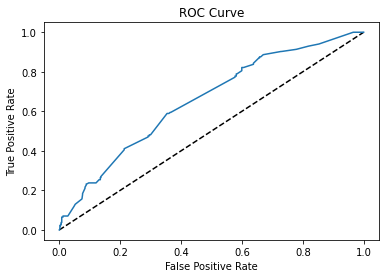

In [93]:
def plot_roc(mod, X, y):
    # predicted_probs is an N x 2 array, where N is number of observations
    # and 2 is number of classes
    predicted_probs = mod.predict_proba(X_test)

    # keep the second column, for label=1
    predicted_prob1 = predicted_probs[:, 1]

    fpr, tpr, _ = metrics.roc_curve(y_test, predicted_prob1)

    # Plot ROC curve
    fig, ax = plt.subplots()
    ax.plot([0, 1], [0, 1], "k--")
    ax.plot(fpr, tpr)
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title("ROC Curve")

plot_roc(random_model_class, X_test, y_test)

In [95]:
predicted_prob1 = random_model_class.predict_proba(X_test)[:, 1]
auc = metrics.roc_auc_score(y_test, predicted_prob1)
print(f"Initial AUC value is {auc:.4f}")

Initial AUC value is 0.6541


In [101]:
accu = metrics.accuracy_score(y_test, random_model_class.predict(X_test))
print(f'The accuracy {accu:.4f}')

recall = metrics.recall_score(y_test, random_model_class.predict(X_test))
print(f'The recall {recall:.4f}')

prec = metrics.precision_score(y_test, random_model_class.predict(X_test))
print(f'The precision {accu:.4f}')

The accuracy 0.7346
The recall 0.0432
The precision 0.7346


In [ ]:
# If we want to create ourselves scoring
# Definite a function score

def scoring_funct(y_true, y_predict):
    return -(np.absolute(y_true - y_predict)).mean()

# Passing for make score. This scorer can be included in scoring (in GridSearchCV)
scorer = metrics.make_scorer(score_func=scoring_funct, greater_is_better=True)

##  Bootstrap Methods

### Bootstrap Methods

* The bootstrap is a general tool for assessing statistical accuracy. 

* Suppose we have a model fit to a set of training data. We denote the training set by $Z = (z_1, z_2, ..., z_N )$ where $z_i = (x_i, y_i)$. 

* The basic idea is to randomly draw datasets with replacement from the training data, each sample the same size as the original training set. This is done $B$ times producing $B$ bootstrap datasets.

* Let $\~{Z}^{b}$ the $b^{\text{th}}$ sample bootstraping

* We can estimate any aspect of the distribution of $S(\~{Z}^{b})$, where $S$ is a point estimation of some parameter

$$\text{Var}[S(\~{Z}^{b})] = \frac{1}{B-1} \sum_{b=1}^{B} (S(\~{Z}^{b}) - \bar{S})^2$$

* Where $\bar{S} = \sum_{b} S(\~{Z}^{b}) /B$ 

* Then we refit the model to each of the bootstrap datasets, and examine the behavior of the fits over the $B$ replications.

* If $f^{*b}(x_i)$ is the predicted value at $x_i$, from the model fitted to the $b^{\text{th}}$ bootstrap dataset, our estimate is
$$\text{Err}_{\text{boot}} = \frac{1}{B}\;\frac{1}{N}\sum_{b=1}^{B} \sum_{i = 1}^{N} L(y_i, f^{*b}(x_i))$$
But $\text{Err}_{\text{boot}}$ does not provide a good estimate in general. 

* The reason is that the bootstrap datasets are acting as the training samples, while the original training set is acting as the test sample, and these two samples have observations in common. 

* This overlap can make overfit predictions look unrealistically good
A better bootstrap estimate can be obtained. For each observation, we only keep track of predictions from bootstrap samples not containing that observation. The leave-one-out bootstrap estimate of prediction error is defined by
$$Err_{boot} = \frac{1}{N}\;\sum_{i=1}^{N} \frac{1}{|C^{-i}|} \sum_{b \in C^{-i}}^{B} L(y_i, f^{*b}(x_i)$$
